In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#Dataset
The dataset contains information regarding Melbourne Housing Market. Melbourne experienced a housing bubble. We want to see the trend and make some predictions. <br>
The dataset is provided on the following website: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market



Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:

S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [202]:
data = pd.read_csv("/content/Melbourne_housing_FULL.csv")

In [203]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [204]:
data.shape
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [205]:
#Missing values in all columns
data[data.notnull()]


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [206]:
data[data.notnull()].count()

Suburb           34857
Address          34857
Rooms            34857
Type             34857
Price            27247
Method           34857
SellerG          34857
Date             34857
Distance         34856
Postcode         34856
Bedroom2         26640
Bathroom         26631
Car              26129
Landsize         23047
BuildingArea     13742
YearBuilt        15551
CouncilArea      34854
Lattitude        26881
Longtitude       26881
Regionname       34854
Propertycount    34854
dtype: int64

In [207]:
#Rows that don't contain any null values
data[data.notnull().all(axis=1)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,...,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [208]:
#Total rows that don't contain any null values
data[data.notnull().all(axis=1)].count()

Suburb           8887
Address          8887
Rooms            8887
Type             8887
Price            8887
Method           8887
SellerG          8887
Date             8887
Distance         8887
Postcode         8887
Bedroom2         8887
Bathroom         8887
Car              8887
Landsize         8887
BuildingArea     8887
YearBuilt        8887
CouncilArea      8887
Lattitude        8887
Longtitude       8887
Regionname       8887
Propertycount    8887
dtype: int64

In [209]:
#Remove all rows where price is 0
filtered_data = data.loc[data['Price']>0]

In [210]:
#Don't have any rows that contain null values
filtered_data[filtered_data["Price"].isnull()].count()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

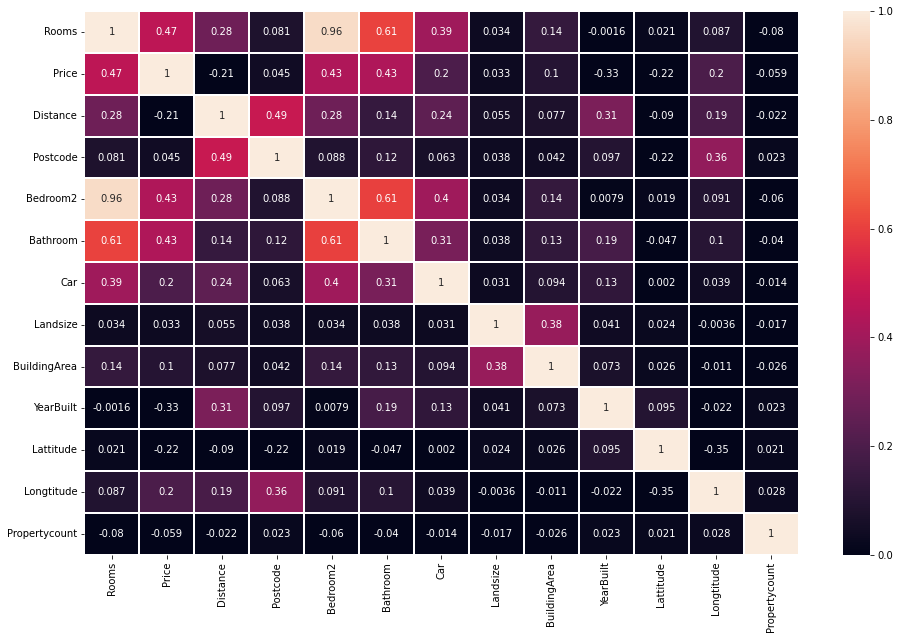

In [211]:
plt.figure(figsize = (16,10))
sns.heatmap(filtered_data.corr(), vmin =0, vmax = 1, annot = True, linewidth = 1)
plt.show()

We can see that the price has a high correlation with rooms, bedrooms and bathrooms.



<Figure size 720x864 with 0 Axes>

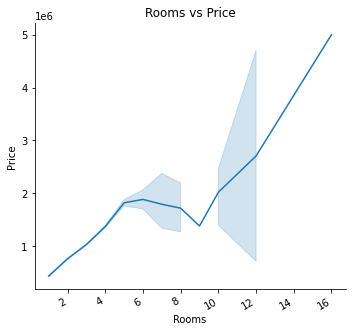

In [212]:
room_price = filtered_data[["Rooms", "Price"]]
plt.figure(figsize=(10,12))
g = sns.relplot(x="Rooms", y="Price", kind = "line", data = room_price)
plt.title("Rooms vs Price")
g.figure.autofmt_xdate()

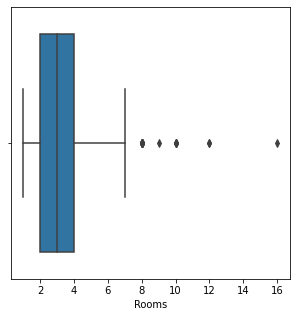

In [213]:
plt.figure(figsize=(5,5))
sns.boxplot(x=room_price["Rooms"])
plt.show()

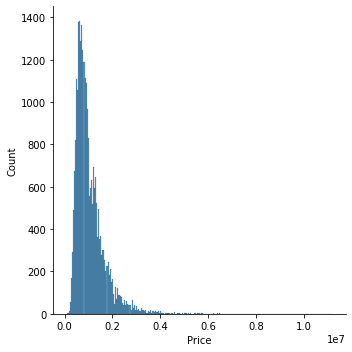

In [214]:
sns.displot(room_price['Price'])

We can see that the price of house dramatically increase after 8 rooms. Moreover, 8 rooms or more are consider as an outlier so we will see how many houses we have that contains 8 rooms or more. It will assist us in knowing if we can remove them when performing linear regression.

In [215]:
filtered_data[filtered_data["Rooms"]>=8].count()

Suburb           23
Address          23
Rooms            23
Type             23
Price            23
Method           23
SellerG          23
Date             23
Distance         23
Postcode         23
Bedroom2         16
Bathroom         16
Car              15
Landsize         13
BuildingArea      7
YearBuilt         8
CouncilArea      23
Lattitude        20
Longtitude       20
Regionname       23
Propertycount    23
dtype: int64

In [216]:
filtered_data[filtered_data["Rooms"]<8].count()

Suburb           27224
Address          27224
Rooms            27224
Type             27224
Price            27224
Method           27224
SellerG          27224
Date             27224
Distance         27223
Postcode         27223
Bedroom2         20790
Bathroom         20784
Car              20408
Landsize         17969
BuildingArea     10649
YearBuilt        12076
CouncilArea      27221
Lattitude        20973
Longtitude       20973
Regionname       27221
Propertycount    27221
dtype: int64

Since it not a lot of houses that contain these outlier so we will remove the outliers.

In [217]:
#Remove outlier room
room_outler = filtered_data[filtered_data["Rooms"]>=8].index
filtered_data = filtered_data.drop(room_outler, axis=0)

In [218]:
#Drop longitude, latitude & Seller since we don't want too many variables when training regression model
filtered_data.drop(['Longtitude', 'Lattitude', 'SellerG'], axis=1, inplace=True)

In [219]:
filtered_data

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,Western Metropolitan,6543.0


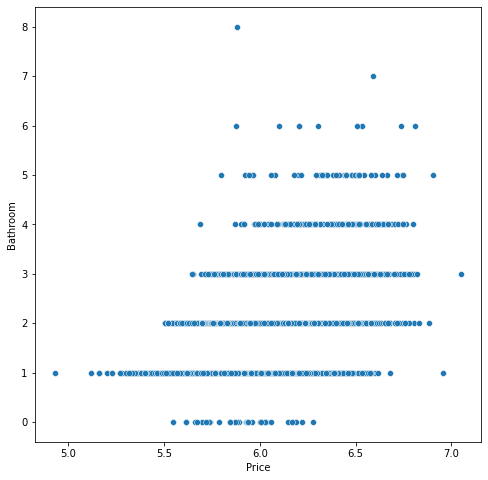

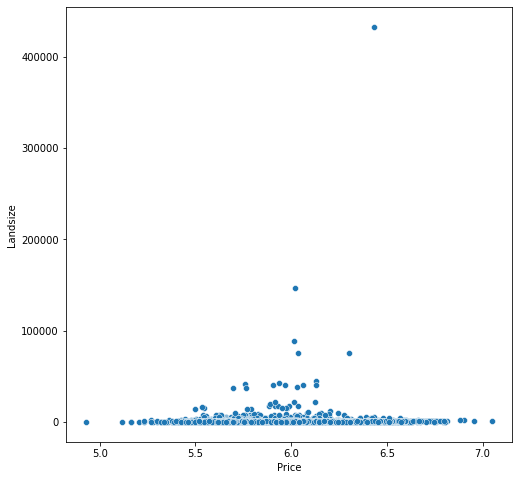

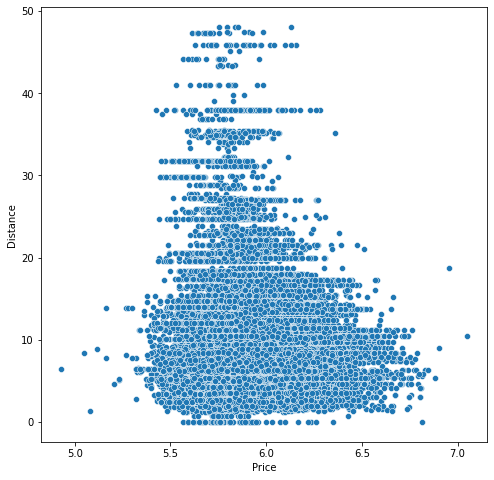

In [220]:
distribution = ["Bathroom", "Landsize", "Distance"]
for i in range(len(distribution)):
  price_bathroom = filtered_data[["Price", distribution[i]]]
  plt.figure(figsize=(8,8))
  sns.scatterplot(x=np.log10(data['Price']), y=distribution[i], data=price_bathroom)
  plt.show()

We can see how price is correlated to distance, landsize, and number of bathroom

In [221]:
filtered_data

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,Western Metropolitan,6543.0


## Regression

In [222]:
#Drop unecessary column
filtered_data = filtered_data.drop(['Address', 'Postcode', 'Date'], axis = 1)

In [223]:
filtered_data.count()

Suburb           27224
Rooms            27224
Type             27224
Price            27224
Method           27224
Distance         27223
Bedroom2         20790
Bathroom         20784
Car              20408
Landsize         17969
BuildingArea     10649
YearBuilt        12076
CouncilArea      27221
Regionname       27221
Propertycount    27221
dtype: int64

In [224]:
#Determine the number of empty values in each column
filtered_data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price                0
Method               0
Distance             1
Bedroom2          6434
Bathroom          6440
Car               6816
Landsize          9255
BuildingArea     16575
YearBuilt        15148
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [225]:
# Fill certain columns that contain NAN values with zero
cols_to_zero = ['Distance','Car', 'CouncilArea', 'Regionname', 'Propertycount']
filtered_data[cols_to_zero] = filtered_data[cols_to_zero].fillna(0)

In [226]:
filtered_data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price                0
Method               0
Distance             0
Bedroom2          6434
Bathroom          6440
Car                  0
Landsize          9255
BuildingArea     16575
YearBuilt        15148
CouncilArea          0
Regionname           0
Propertycount        0
dtype: int64

In [227]:
# For Landsize, BuildingArea, and YearsBuilt, replace NAN values with mean
filtered_data['Landsize'] = filtered_data['Landsize'].fillna(filtered_data.Landsize.mean())
filtered_data['BuildingArea'] = filtered_data['BuildingArea'].fillna(filtered_data.BuildingArea.mean())
filtered_data['YearBuilt'] = filtered_data['YearBuilt'].fillna(filtered_data.YearBuilt.mean())
filtered_data['Bedroom2'] = filtered_data['Bedroom2'].fillna(filtered_data.Bedroom2.mean())
filtered_data['Bathroom'] = filtered_data['Bathroom'].fillna(filtered_data.Bathroom.mean())

In [228]:
filtered_data.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [229]:
# Perform one-hot encoding since we have categorical variables
cat_data = pd.get_dummies(filtered_data, columns=['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname'], drop_first=True)
cat_data

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,2.000000,1.000000,1.0,202.000000,156.766114,1966.602766,4019.0,...,1,0,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,2.000000,1.000000,0.0,156.000000,79.000000,1900.000000,4019.0,...,1,0,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.000000,2.000000,0.0,134.000000,150.000000,1900.000000,4019.0,...,1,0,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,3.000000,2.000000,1.0,94.000000,156.766114,1966.602766,4019.0,...,1,0,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3.000000,1.000000,2.0,120.000000,142.000000,2014.000000,4019.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,4.000000,1.000000,3.0,593.000000,156.766114,1966.602766,6543.0,...,0,0,0,0,0,0,0,0,1,0
34853,2,888000.0,6.3,2.000000,2.000000,1.0,98.000000,104.000000,2018.000000,6543.0,...,0,0,0,0,0,0,0,0,1,0
34854,2,705000.0,6.3,2.000000,1.000000,2.0,220.000000,120.000000,2000.000000,6543.0,...,0,0,0,0,0,0,0,0,1,0
34855,3,1140000.0,6.3,3.041991,1.589444,0.0,592.839613,156.766114,1966.602766,6543.0,...,0,0,0,0,0,0,0,0,1,0


In [230]:
x = cat_data.drop(['Price'], axis = 1)
y = cat_data['Price']

In [231]:
print(x.shape, y.shape)

(27224, 400) (27224,)


In [232]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg

LinearRegression()

In [233]:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))

Train score: 0.6672613023414722, Test score: -16858382458.76085


In [234]:
#Since our test score is not really good (overfitting), we will try to use L1 & L2 regularization
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 50, max_iter = 100, tol = 0.1)
lasso.fit(X_train, y_train)

train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))

Train score: 0.6656199059603458, Test score: 0.6551362973489796


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.343e+15, tolerance: 7.870e+14
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [235]:
#We also try to use Ridge Regression 
ridge = linear_model.Ridge(alpha = 50, max_iter = 100, tol = 0.1)
ridge.fit(X_train, y_train)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))

Train score: 0.6560360074973447, Test score: 0.6510658222205394


In [236]:
#Predict values
y_predict = ridge.predict(X_test)

# Compare predicted and actual values

df_comp = pd.DataFrame({'Actual': np.round(y_test, 2), 
                   'Predicted': np.round(y_predict, 2)})
df_comp.head(10)

,Actual,Predicted
20641,915000.0,1232377.38
19704,867000.0,743255.63
22191,1210000.0,1598434.44
1421,1100000.0,1118651.60
18094,450000.0,294464.72
32028,560000.0,619016.19
3718,1901000.0,1951756.69
30043,1360000.0,1573161.20
5717,705000.0,567069.35
15783,670000.0,428278.11


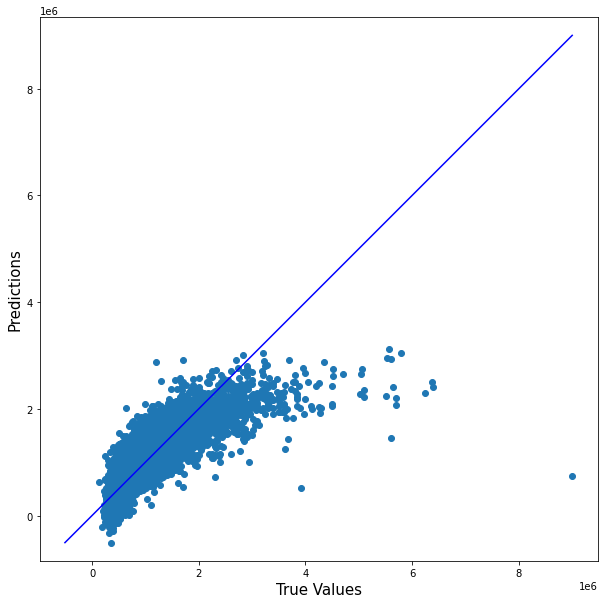

In [237]:
# Plot he predicted vs actual prices 
plt.figure(figsize=(10,10))
plt.scatter(df_comp['Actual'], df_comp['Predicted'])

p1 = max(max(df_comp['Predicted']), max(df_comp['Actual']))
p2 = min(min(df_comp['Predicted']), min(df_comp['Actual']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()